## Abalone dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [11]:
X = df.drop(columns=['Sex'])
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [18]:
print(X.shape)
X = StandardScaler().fit_transform(X)
X.shape

(4177, 8)


(4177, 8)

In [ ]:
cluster_range = range(2,15)

cluster_errors = []
for n in cluster_range:
    cluster = KMeans(n,n_init=10)
    cluster.fit(X)
    labels = cluster.labels_
    centroids = cluster.cluster_centers_
    cluster_errors.append(cluster.inertia_)
# cluster_df = 

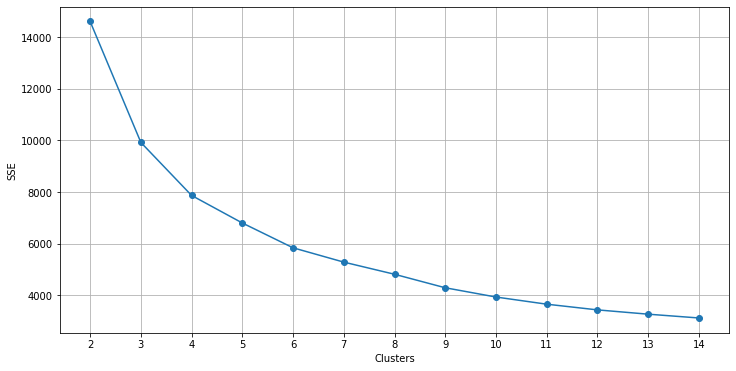

In [46]:
scree_plot = pd.DataFrame({"Clusters":cluster_range,"SSE":cluster_errors})
plt.figure(figsize=(12,6))
plt.plot(scree_plot.Clusters,scree_plot.SSE,'-o')
plt.ylabel('SSE')
plt.xlabel('Clusters')
plt.xticks(range(2,15))
plt.grid(True)
plt.show()

k = 3 is having the highest steep

In [50]:
# fit with 3 clusters
cluster_3 = KMeans(n_clusters=3,n_init=10).fit(X)

In [56]:
cluster_3.labels_

array([2, 0, 2, ..., 1, 1, 1])

In [59]:
cluster_3.cluster_centers_

(3, 8)

In [82]:
df_new = pd.DataFrame(X,columns=df.columns[1:])
df_new['clusters'] = cluster_3.labels_
df_new['gender'] = df['Sex']
df_new.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,clusters,gender
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,2,M
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,0,M
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,2,F
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,2,M
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,0,I


In [83]:
df_new['gender'].value_counts()

M    1528
I    1342
F    1307
Name: gender, dtype: int64

In [79]:
df_new['clusters'].value_counts()

2    1773
1    1224
0    1180
Name: clusters, dtype: int64